In [68]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
X = 6 * np.random.rand(100,1) - 3
y= 0.5 * X**2 + 1.5 * X +2 + np.random.randn(100,1)
#this is my quadratic equation used y =0.5x^2+1.5x+2+outliers

Text(0, 0.5, 'y dataset')

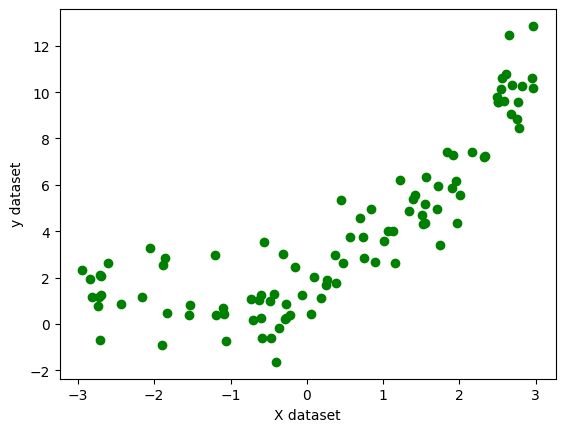

In [70]:
plt.scatter(X,y,color = "g")
plt.xlabel("X dataset")
plt.ylabel("y dataset")

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state = 42)

In [72]:
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [73]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [74]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression_1.predict(X_test))

In [75]:
score


0.6762639303719535

In [76]:
# lest visualize the data

Text(0, 0.5, 'y_dataset')

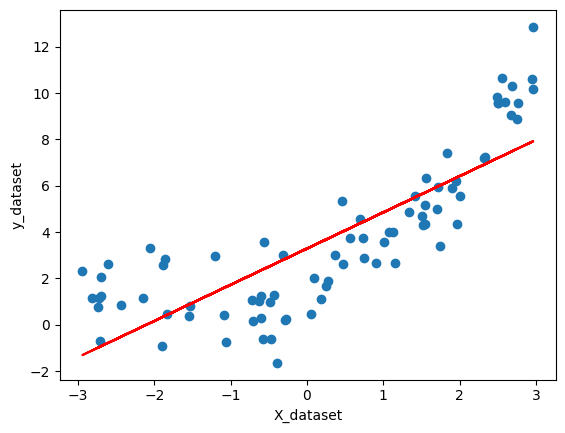

In [77]:
plt.plot(X_train,regression_1.predict(X_train),color = "r")
plt.scatter(X_train,y_train)
plt.xlabel("X_dataset")
plt.ylabel("y_dataset")

In [78]:
# we got lot,s of error how can we solve this type of data by polynomial

In [79]:
# lets apppy polynomial transformation

from sklearn.preprocessing import PolynomialFeatures

In [80]:
poly = PolynomialFeatures(degree=2,include_bias = True)


In [81]:
X_train_poly= poly.fit_transform(X_train)
X_test_poly= poly.transform(X_test)

In [82]:
X_train_poly

array([[ 1.00000000e+00,  5.65695091e-01,  3.20010936e-01],
       [ 1.00000000e+00, -5.65117142e-01,  3.19357384e-01],
       [ 1.00000000e+00,  5.89145110e-02,  3.47091961e-03],
       [ 1.00000000e+00,  2.94666867e+00,  8.68285627e+00],
       [ 1.00000000e+00,  7.52743637e-01,  5.66622983e-01],
       [ 1.00000000e+00, -1.52935403e+00,  2.33892374e+00],
       [ 1.00000000e+00,  1.50955828e+00,  2.27876620e+00],
       [ 1.00000000e+00, -5.96718050e-01,  3.56072431e-01],
       [ 1.00000000e+00, -2.43823098e+00,  5.94497029e+00],
       [ 1.00000000e+00, -2.74089310e+00,  7.51249498e+00],
       [ 1.00000000e+00,  1.51992229e+00,  2.31016378e+00],
       [ 1.00000000e+00,  2.49611081e+00,  6.23056916e+00],
       [ 1.00000000e+00,  1.96170900e+00,  3.84830220e+00],
       [ 1.00000000e+00, -3.98005344e-01,  1.58408254e-01],
       [ 1.00000000e+00, -2.05703613e+00,  4.23139763e+00],
       [ 1.00000000e+00, -1.08619696e+00,  1.17982384e+00],
       [ 1.00000000e+00,  2.50429973e+00

In [83]:
X_test_poly

array([[ 1.00000000e+00,  2.78386610e+00,  7.74991048e+00],
       [ 1.00000000e+00, -2.84061416e+00,  8.06908881e+00],
       [ 1.00000000e+00,  2.60460891e+00,  6.78398759e+00],
       [ 1.00000000e+00, -1.51384510e-01,  2.29172697e-02],
       [ 1.00000000e+00,  2.53846648e+00,  6.44381207e+00],
       [ 1.00000000e+00, -2.71170510e+00,  7.35334453e+00],
       [ 1.00000000e+00, -2.71352019e-01,  7.36319185e-02],
       [ 1.00000000e+00,  8.41394368e-01,  7.07944483e-01],
       [ 1.00000000e+00,  1.22739231e+00,  1.50649189e+00],
       [ 1.00000000e+00,  1.91176573e+00,  3.65484820e+00],
       [ 1.00000000e+00, -1.09357747e+00,  1.19591169e+00],
       [ 1.00000000e+00, -6.40699994e-02,  4.10496482e-03],
       [ 1.00000000e+00,  2.82401867e+00,  7.97508145e+00],
       [ 1.00000000e+00, -3.59209412e-01,  1.29031402e-01],
       [ 1.00000000e+00,  2.16946472e+00,  4.70657717e+00],
       [ 1.00000000e+00,  2.65073039e+00,  7.02637161e+00],
       [ 1.00000000e+00,  3.79031949e-01

In [84]:
# take linear regression now 

from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.911000402614953


In [85]:
print(regression.coef_)

[[0.         1.47963118 0.55381656]]


In [86]:
print(regression.intercept_)

[1.57089009]


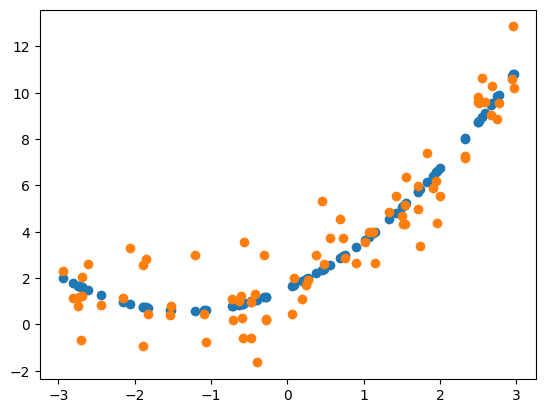

In [90]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)


In [ ]:
# when we put deg = 3 

In [91]:
poly2 = PolynomialFeatures(degree=3,include_bias = True)
X_train_poly1= poly2.fit_transform(X_train)
X_test_poly1= poly2.transform(X_test)

In [92]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly1,y_train)
y_pred = regression.predict(X_test_poly1)
score = r2_score(y_test,y_pred)
print(score)

0.9040338900438512


In [93]:
# prediction of new data

In [96]:
X_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly2.transform(X_new)

In [97]:
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

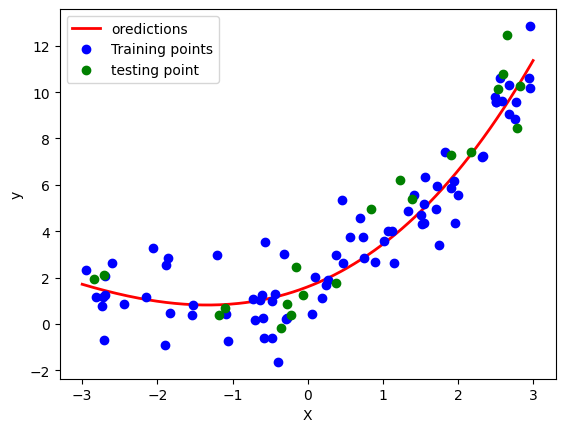

In [125]:
y_new = regression.predict(x_new_poly)
plt.plot(X_new , y_new , "r" , linewidth=2,label = "oredictions")
plt.plot(X_train,y_train,"bo",label= "Training points")
plt.plot(X_test,y_test, "go",label = "testing point")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Pipeline Concepts

In [108]:
 X_new = np.linspace(-3,3,200)

In [114]:
X_new.shape

(200,)

In [110]:
 x_new = np.linspace(-3,3,200).reshape(200,1)

In [112]:
x_new.shape

(200, 1)

In [107]:
from sklearn.pipeline import Pipeline

In [134]:
def ploy_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    
    poly_feature = PolynomialFeatures(degree = degree ,include_bias = True)
    lin_reg = LinearRegression()
    poly_regression =Pipeline([
        ("poly_feature",poly_feature),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## creating polynomial 
    y_pred_new = poly_regression.predict(X_new)
    ## ploting prediction line
    plt.plot(X_new,y_pred_new,"r",label = "degree" + str(degree), linewidth=3)
    plt.plot(X_train,y_train,"b.",linewidth = 3,label= "traing data")
    plt.plot(X_test,y_test,"g.",linewidth = 3 ,label ="pediction data")
    plt.legend(loc = "upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4,0,10])
    plt.show()
    

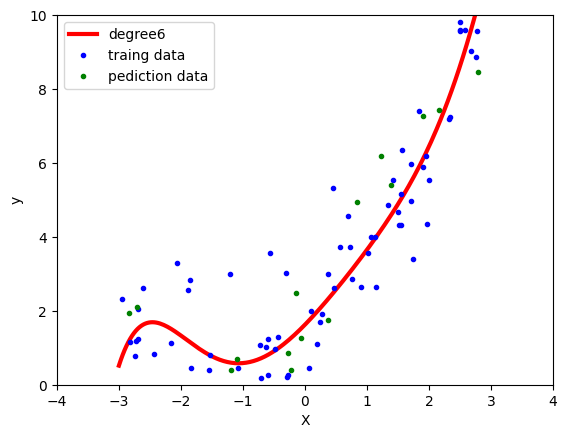

In [136]:
ploy_regression(6)